# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.2'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Data Repository (2020), https://github.com/jmcastagnetto/covid-19-peru-data
Twitter Web Scraper

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
World Health Organization (2020), https://covid19.who.int
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/dsfsi/covid19za
COVID-19_plus_Russia GitHub repository (2020), https://github.com/grwlf/COVID-19_plus_Russia
COVID-19 Peru Data Repository (2020), https://github.com/jmcastagnetto/covid-19-peru-data
Twitter Web Scraper

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
210231,2020-09-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210232,2020-09-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210233,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210234,2020-09-09,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210235,2020-09-10,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
210231,2020-09-06,Colombia,Vichada,14,0,0,14
210232,2020-09-07,Colombia,Vichada,14,0,0,14
210233,2020-09-08,Colombia,Vichada,14,0,0,14
210234,2020-09-09,Colombia,Vichada,14,0,0,14
210235,2020-09-10,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
171,2020-09-06,21772,2528,369,18875
172,2020-09-07,21849,2510,372,18967
173,2020-09-08,22019,2470,378,19171
174,2020-09-09,22168,2349,379,19440
175,2020-09-10,22444,2478,379,19587


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-09-06,26942245,8043917,881293,18017035,0.016355,0.334364,0.046633
2020-09-07,27149512,8065976,890425,18193111,0.016399,0.335054,0.046659
2020-09-08,27385961,8103348,895184,18387429,0.016344,0.335709,0.046424
2020-09-09,27656961,8154182,900821,18601958,0.016286,0.336298,0.046189
2020-09-10,27657738,8153756,900835,18603147,0.016285,0.336310,0.046187


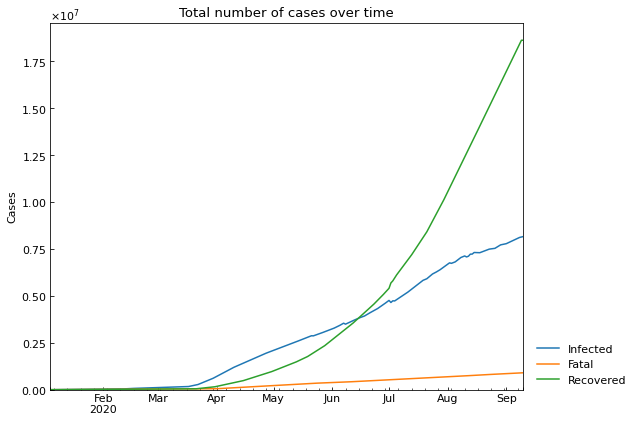

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
210,2020-09-06,71929,8497,1369,62063
211,2020-09-07,72238,8335,1380,62523
212,2020-09-08,72729,8068,1398,63263
213,2020-09-09,73237,7742,1412,64083
214,2020-09-10,73948,7709,1419,64820


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
208,2020-09-06,71419,7986,1357,62076
209,2020-09-07,71856,7957,1363,62536
210,2020-09-08,72234,7575,1377,63282
211,2020-09-09,72726,7233,1393,64100
212,2020-09-10,73221,6980,1406,64835


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
210231,2020-09-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210232,2020-09-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210233,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210234,2020-09-09,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210235,2020-09-10,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
197271,COL,Colombia,Vichada,2020-09-06,107808
197272,COL,Colombia,Vichada,2020-09-07,107808
197273,COL,Colombia,Vichada,2020-09-08,107808
197274,COL,Colombia,Vichada,2020-09-09,107808
197275,COL,Colombia,Vichada,2020-09-10,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
210231,2020-09-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210232,2020-09-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210233,2020-09-08,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210234,2020-09-09,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
210235,2020-09-10,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
210231,2020-09-06,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
210232,2020-09-07,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
210233,2020-09-08,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
210234,2020-09-09,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
210235,2020-09-10,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
246,2020-09-06,1,1,1,0,0,1,1,3,2,2,1,30.56
247,2020-09-07,1,1,1,0,0,1,1,3,2,2,1,30.56
248,2020-09-08,1,1,1,0,0,1,1,3,2,2,1,30.56
249,2020-09-09,1,1,1,0,0,1,1,3,2,2,1,30.56
250,2020-09-10,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
246,2020-09-06,1,1,1,0,0,1,1,3,2,2,1,30.56
247,2020-09-07,1,1,1,0,0,1,1,3,2,2,1,30.56
248,2020-09-08,1,1,1,0,0,1,1,3,2,2,1,30.56
249,2020-09-09,1,1,1,0,0,1,1,3,2,2,1,30.56
250,2020-09-10,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

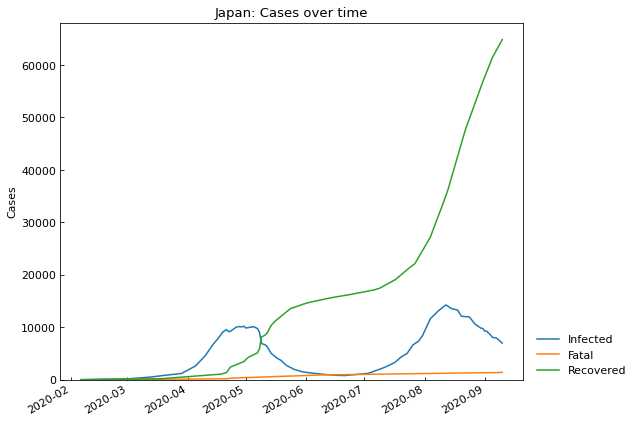

,Date,Confirmed,Infected,Fatal,Recovered
208,2020-09-06,71419,7986,1357,62076
209,2020-09-07,71856,7957,1363,62536
210,2020-09-08,72234,7575,1377,63282
211,2020-09-09,72726,7233,1393,64100
212,2020-09-10,73221,6980,1406,64835


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

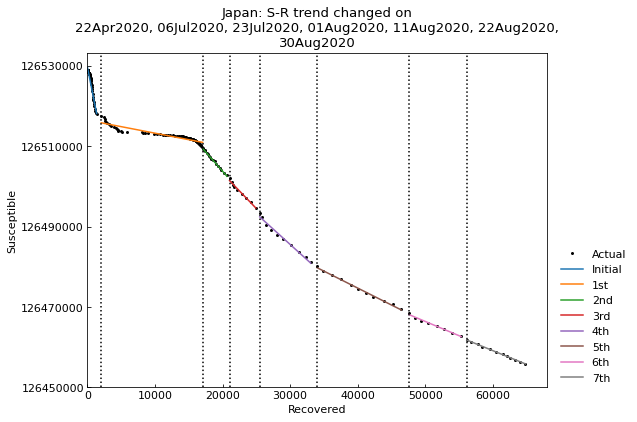

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,05Jul2020,126529100
2nd,Past,06Jul2020,22Jul2020,126529100
3rd,Past,23Jul2020,31Jul2020,126529100
4th,Past,01Aug2020,10Aug2020,126529100
5th,Past,11Aug2020,21Aug2020,126529100
6th,Past,22Aug2020,29Aug2020,126529100
7th,Past,30Aug2020,10Sep2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	7th phase (30Aug2020 - 10Sep2020): finished  262 trials in 0 min 10 sec

	3rd phase (23Jul2020 - 31Jul2020): finished  448 trials in 0 min 15 sec

	4th phase (01Aug2020 - 10Aug2020): finished  157 trials in 0 min  5 sec

	2nd phase (06Jul2020 - 22Jul2020): finished 1421 trials in 1 min  0 sec

	1st phase (22Apr2020 - 05Jul2020): finished 1349 trials in 1 min  0 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1354 trials in 1 min  0 sec

	6th phase (22Aug2020 - 29Aug2020): finished  203 trials in 0 min  5 sec

	5th phase (11Aug2020 - 21Aug2020): finished 1512 trials in 1 min  0 sec

Completed optimization. Total: 1 min 31 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/beta [day],alpha1 [-],1/alpha2 [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,4.88,0.000120,0.000594,0.025352,0.004603,360,9,0.000,420,54,0.929576,1354,1 min 0 sec
1st,Past,22Apr2020,05Jul2020,126529100,SIR-F,0.36,0.047889,0.000533,0.006008,0.015183,360,41,0.048,468,16,0.820814,1349,1 min 0 sec
2nd,Past,06Jul2020,22Jul2020,126529100,SIR-F,2.04,0.000677,0.000021,0.033159,0.016249,360,7,0.001,11751,15,0.030952,1421,1 min 0 sec
3rd,Past,23Jul2020,31Jul2020,126529100,SIR-F,1.89,0.001114,0.000046,0.033613,0.017743,360,7,0.001,5456,14,0.036019,448,0 min 15 sec
4th,Past,01Aug2020,10Aug2020,126529100,SIR-F,1.67,0.000805,0.000079,0.028017,0.016705,360,8,0.001,3152,14,0.038062,157,0 min 5 sec
5th,Past,11Aug2020,21Aug2020,126529100,SIR-F,0.89,0.000153,0.000176,0.020999,0.023364,360,11,0.000,1421,10,0.020707,1512,1 min 0 sec
6th,Past,22Aug2020,29Aug2020,126529100,SIR-F,0.72,0.001115,0.000191,0.017778,0.024577,360,14,0.001,1307,10,0.021164,203,0 min 5 sec
7th,Past,30Aug2020,10Sep2020,126529100,SIR-F,0.68,0.015513,0.000172,0.015821,0.022608,360,15,0.016,1456,11,0.013789,262,0 min 10 sec


### Accuracy of estimation

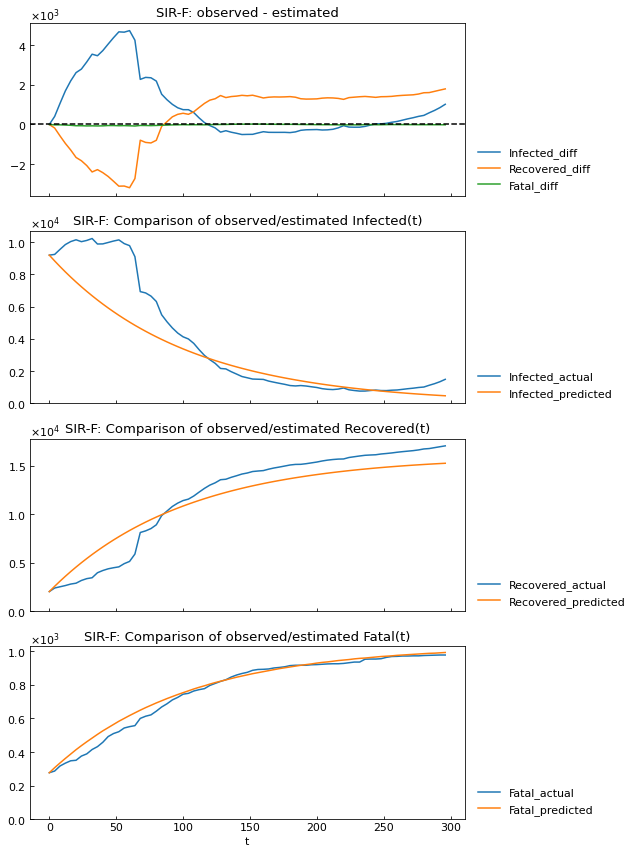

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.67

### Show parameter history

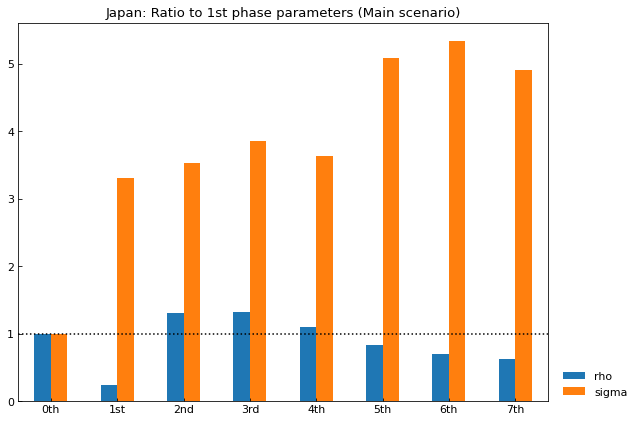

,0th,1st,2nd,3rd,4th,5th,6th,7th
rho,1.0,0.236995,1.307930,1.325823,1.105101,0.828290,0.701245,0.624049
sigma,1.0,3.298845,3.530339,3.854992,3.629438,5.076192,5.339864,4.911888


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

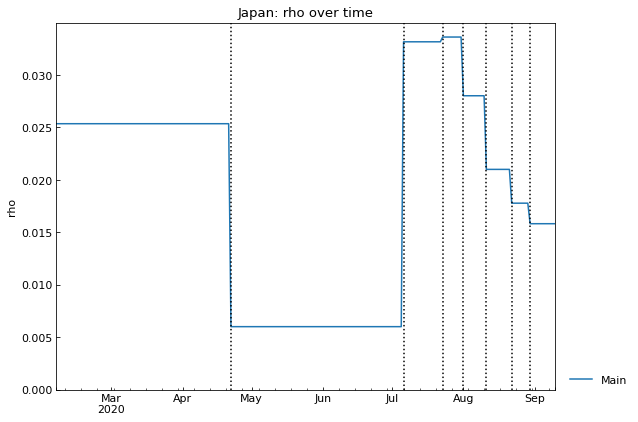

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

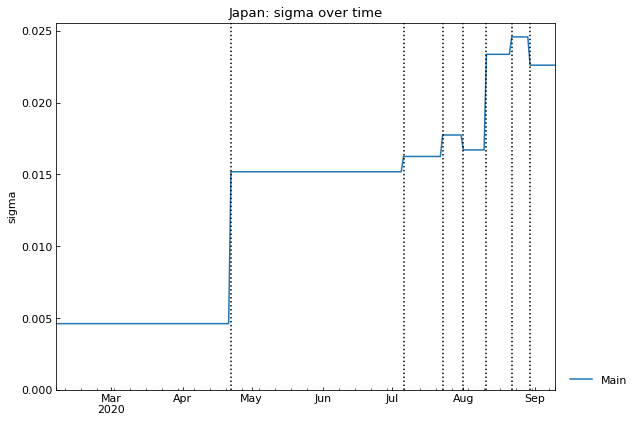

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

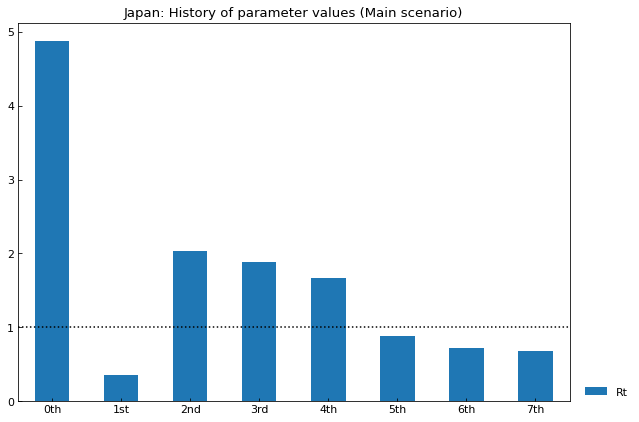

,0th,1st,2nd,3rd,4th,5th,6th,7th
Rt,4.88,0.36,2.04,1.89,1.67,0.89,0.72,0.68


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

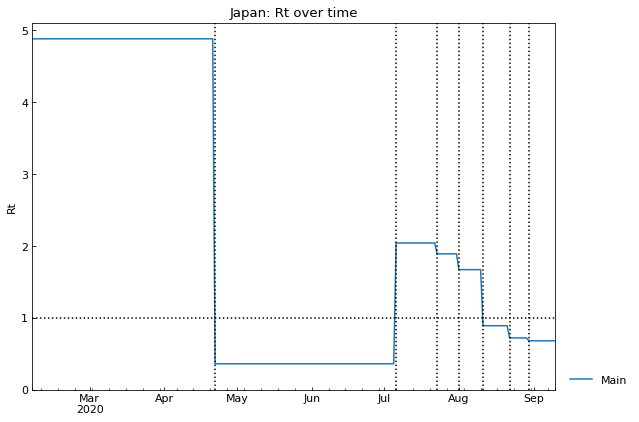

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

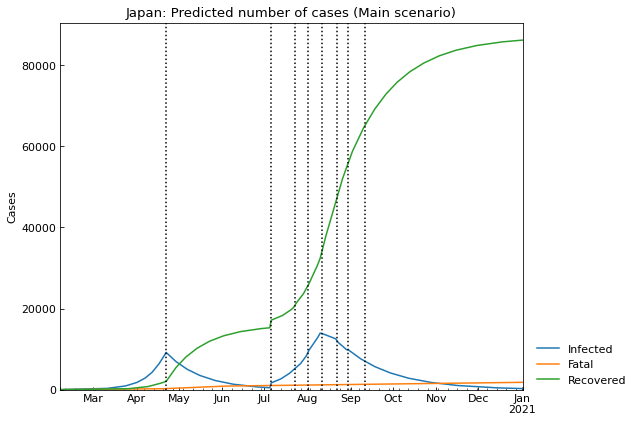

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,88167,1815,301,86051
328,2020-12-30,88184,1815,292,86077
329,2020-12-31,88203,1816,284,86103
330,2021-01-01,88220,1816,276,86128
331,2021-01-02,88238,1817,268,86153


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.022607655194294873

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.045215310388589745

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.88   
         1st      Past  22Apr2020  05Jul2020   126529100  SIR-F  0.36   
         2nd      Past  06Jul2020  22Jul2020   126529100  SIR-F  2.04   
         3rd      Past  23Jul2020  31Jul2020   126529100  SIR-F  1.89   
         4th      Past  01Aug2020  10Aug2020   126529100  SIR-F  1.67   
         5th      Past  11Aug2020  21Aug2020   126529100  SIR-F  0.89   
         6th      Past  22Aug2020  29Aug2020   126529100  SIR-F  0.72   
         7th      Past  30Aug2020  10Sep2020   126529100  SIR-F  0.68   
         8th    Future  11Sep2020  01Jan2021   126529100  SIR-F  0.68   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  4.88   
         1st      Past  22Apr2020  05Jul2020   126529100  SIR-F  0.36   
         2nd      Past  06Jul2020  22Jul2020   126529100  SIR-F  2.04   
         3rd      Past  23Jul2020  31Jul2020   126529100  SIR-F  1.89   
         4th      Past  01Aug2020  10Aug2020   126529100  SIR-F  1.67   
         5th      Past  11Aug2020  21Aug2020   126529100  SIR-F  0.89   
         6th      Past  22Aug2020  29Aug2020   126529100  SIR-F  0.72   
         7th      Past  30Aug2020  10Sep2020   126529100  SIR-F  0.68   
         8th    Future  11Sep2020  11Oct2020   126529100  SIR-F  0.68   
         9th    Future  12Oct2020  01Jan2021   126529100  SIR-F  0.34   

                   theta     kappa       rho     sigma  tau  1/beta [day]  \
Scenario Phase                                                              
Main     0th    0.000120  0.000594  0.025352  0.004603  360             9   
         1st    0.047889  0.000533  0.006008  0.015183  360            41   
         2nd    0.000677  0.000021  0.033159  0.016249  360             7   
         3rd    0.001114  0.000046  0.033613  0.017743  360             7   
         4th    0.000805  0.000079  0.028017  0.016705  360             8   
         5th    0.000153  0.000176  0.020999  0.023364  360            11   
         6th    0.001115  0.000191  0.017778  0.024577  360            14   
         7th    0.015513  0.000172  0.015821  0.022608  360            15   
         8th    0.015513  0.000172  0.015821  0.022608  360            15   
Medicine 0th    0.000120  0.000594  0.025352  0.004603  360             9   
         1st    0.047889  0.000533  0.006008  0.015183  360            41   
         2nd    0.000677  0.000021  0.033159  0.016249  360             7   
         3rd    0.001114  0.000046  0.033613  0.017743  360             7   
         4th    0.000805  0.000079  0.028017  0.016705  360             8   
         5th    0.000153  0.000176  0.020999  0.023364  360            11   
         6th    0.001115  0.000191  0.017778  0.024577  360            14   
         7th    0.015513  0.000172  0.015821  0.022608  360            15   
         8th    0.015513  0.000172  0.015821  0.022608  360            15   
         9th    0.015513  0.000172  0.015821  0.045215  360            15   

                alpha1 [-]  1/alpha2 [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                
Main     0th         0.000             420             54   0.929576   1354   
         1st         0.048             468             16   0.820814   1349   
         2nd         0.001           11751             15  0.0309519   1421   
         3rd         0.001            5456             14  0.0360191    448   
         4th         0.001            3152             14   0.038062    157   
         5th         0.000            1421             10  0.0207065   1512   
         6th         0.001            1307             10  0.0211643    203   
         7th         0.016            1456             11  0.0137894    262   
         8th         0.016            1456             11          -      - 

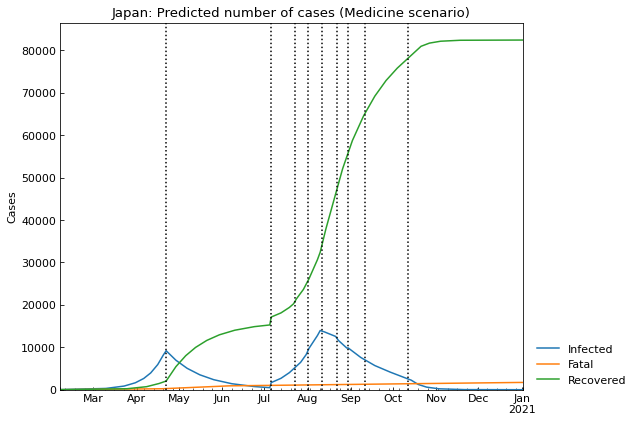

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,84099,1708,0,82391
328,2020-12-30,84099,1708,0,82391
329,2020-12-31,84099,1708,0,82391
330,2021-01-01,84099,1708,0,82391
331,2021-01-02,84099,1708,0,82391


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,9th_Rt
Main,13947,10Aug2020,268,1817,-
Medicine,13947,10Aug2020,0,1708,0.34


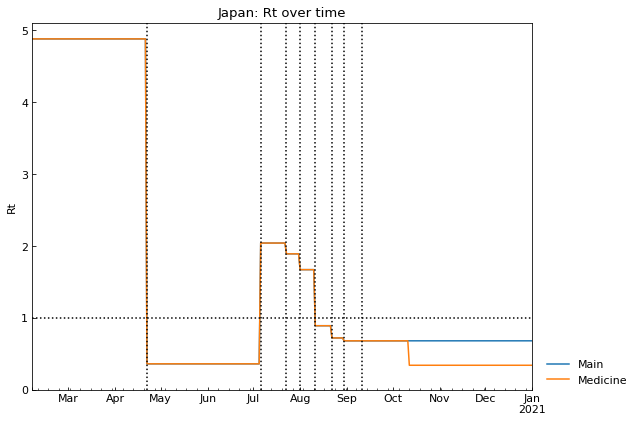

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

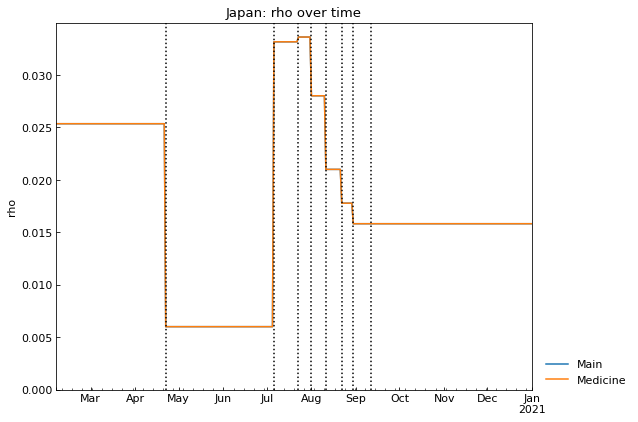

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

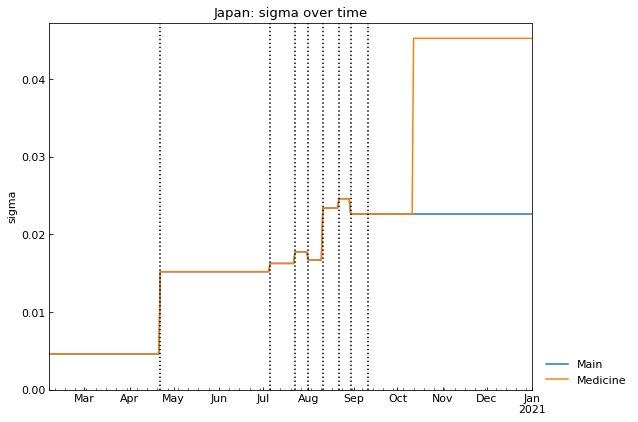

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

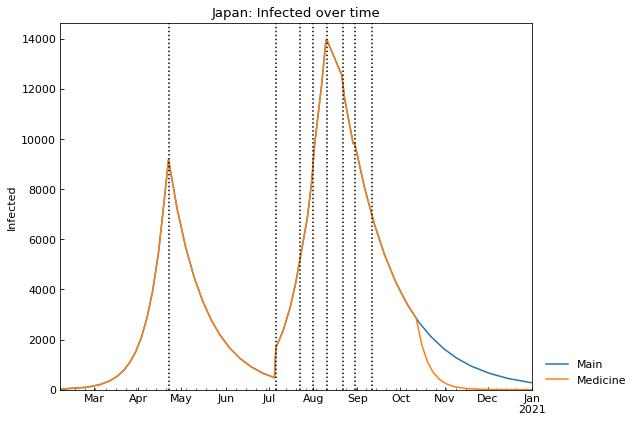

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")